<font color='DarkBlue' size=+2><b>Комментарий ревьюера</b></font><br>
<font color='DarkBlue'>Привет, Александра! <br>Меня зовут Олег Мазуренко, и я буду проверять этот проект. Спасибо за проделанную работу! <br>Ко мне можно обращаться на «ты». Как мне обращаться, напиши.</font><br>
<font color='DarkBlue'>Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</font><br>
<font color='DarkBlue'>Синий текст &mdash; просто текст комментария.</font><br>
<font color='DarkGreen'>👌 Зеленый текст &mdash; все отлично.</font><br>
<font color='DarkMagenta'>👉 Фиолетовый текст &mdash; сделано все правильно, однако есть рекомендации, на что стоит обратить внимание. Реализованные рекомендации позволят нам наработать опыт решения задачи разными способами или посмотреть на задачу под иным углом.</font><br>
<font color='Red'>🛠 Красный текст &mdash; есть недочеты, они иногда бывают. </font><br><font color='DarkBlue'>Любая ошибка это возможность посмотреть на задачу с другой стороны и освоить новые знания, по этому не надо расстраиваться, если они есть.</font><br>
<font color='DarkBlue'>Обращаю внимание, что комментарии ревьюера после проверки удалять нельзя они помогают отследить логику исправления или изменения проекта. Это дополнительный навык при обучении. Свой исправляемый код лучше тоже не удалять, а ремить #, это позволит акцентировать изменения в ходе подготовки окончательного варианта проекта.<br>
Ответы на мои комментарии лучше тоже помечать. 
Например: </font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='DarkBlue'><b>Теперь посмотрим, что у нас получилось!</b></font>

# Исследование успешности компьютерных игр для прогнозирования рекламной кампании.

## Введение

Предмет изучения: данные интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. 
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.

Цель: выявить определяющие успешность игры закономерности  с целью сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Данные о продаже компьютерных игр содержаться в файле: /datasets/real_estate_data.csv до 2016 года. Для начала необходимо ознакомиться с данными, проверить наличие пропусков и заполнить их по возможности, проверить верно ли определены типы данных, выполнить поиск явных и неявных дуюликатов и так делее. После обработки данных можно приступить к их исследованию: описанию основных параметров и поиску закономерностей. Для достижения поставленной цели необходимо составить портрет типичного пользователя в разных регионах, а также выделить наиболее перпективные платформы для планирования рекламных кампаний. Результаты анализа можно подкрепить проверкой гипотез. 

Таким образом, в работе можно выделить следующие этапы:
1. Обзор данных
2. Подготовка данных к исследованию
3. Исследовательский анализ данных
4. Анализ портрета пользователя для каждого региона
5. Проверка гипотез
6. Общий вывод

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, сделано описание проекта. 👍</font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import numpy as np
from scipy import stats as st

## Обзор данных

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


В датасете представлена следующая информация:
+ Name — название игры
+ Platform — платформа
+ Year_of_Release — год выпуска
+ Genre — жанр игры
+ NA_sales — продажи в Северной Америке (миллионы проданных копий)
+ EU_sales — продажи в Европе (миллионы проданных копий)
+ JP_sales — продажи в Японии (миллионы проданных копий)
+ Other_sales — продажи в других странах (миллионы проданных копий)
+ Critic_Score — оценка критиков (максимум 100)
+ User_Score — оценка пользователей (максимум 10)
+ Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод
По результатам первичного обзора данных:
+ Необходимо привести названия столбцов к нижнему регистру для более удобного выполнения последующего исследования. 
+ Столбец с годом релиза имеет неправильным тип
+ Столбец с оценкой пользователей такжеимеет неправильным тип
+ Наблюдается большое количество пропусков, особенно в столбцах с оценками и рейтингом.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, изучили данные для предобработки.</font>

## Предобработка данных

Приведем названия столбцов к нижнему регистру.

In [4]:
#df.columns = ['name','platform','year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо! Приводим названия колонок к общепринятому стилю. 😉 <br>
А можно просто методом вот так:</font><br>
`df.columns = df.columns.str.lower()`

In [5]:
df.columns = df.columns.str.lower()

</font><font color='Blue'><b>Применила</b></font><br>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Короткий код - показатель профессионализма. Мы профи! Или как? 😄</font>

Колличество пропусков в %

In [6]:
pd.DataFrame(df.isna().mean()*100).style.background_gradient('coolwarm')

,0
name,0.011965
platform,0.000000
year_of_release,1.609333
genre,0.011965
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.319174
user_score,40.089740


Самый большой процент пропусков отмечен в колонках critic_score, user_score, rating, в который отражается рейтинг компьютерных игр. 
Однако, столбцы с оценкой пользователей и критиков заполнить медианой по жанру или по платформе было бы неверно, так как оценка игры вряд ли от этого зависит.

Возможные причины появления пропусков можно разделить на зависящие от человеческого или технического факторов. Пропуски в названии игры, годе реализации и жанре скорее всего относятся к техническому фактору и появлись, например, благодаря неправильной выгрузке. Пропуски в столбцах с оценками и рейтингами могут относится как к техническому, так и человеческому фактору, то есть можно предположить и ошибку при. выгрузке и впринципе отсутсвие этих данных для конкретной игры. Отсутствие оценок часто может наблюдаться у только что вышедших игр.

Так как пропуски в столбцах с названием игры, годом реализации и жанром затруднительно заполнить верной информацией и таких пропусков меньше 5%-10%, то их позволительно удалить.

In [7]:
df = df.dropna(subset=['name']).reset_index(drop=True)
df = df.dropna(subset=['year_of_release']).reset_index(drop=True)
df = df.dropna(subset=['genre']).reset_index(drop=True)

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что удалили пропуски, тем более в этих строках еще хватает пропусков по другим колонкам.</font>

TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить.

In [8]:
df.loc[df['user_score'] == "tbd", 'user_score'] = "NaN"

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильно сделана замена "tbd" на NaN. Это практически аналог пропусков. Лучше было сделать вот так: `= np.nan`.</font>

In [9]:
#df.loc[df['user_score'] == "tbd", 'user_score'] == np.nan

</font><font color='Blue'><b> Почему-то если сделать предложенным способом, потом тип данных не меняется на float </b></font><br>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 Лучше делать: `df['user_score'] = df['user_score'].replace('tbd', np.NaN)`.</font>

Приводим столбца в необходимый формат:

In [10]:
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y').dt.year
try:
    df['user_score'] = df['user_score'].astype(float)
except:
    pass

In [11]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

В колонке  Жанр отсутствуют неявные дубликаты

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Добавим новый столбец с общими продажами по всему миру.

In [13]:
#df['sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Молодец, не забыли создать колонку с общими продажами. 👍 <br> А можно использовать вот такой код:</font><br>
`= data.loc[:,['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)`

In [14]:
df['sales'] = df.loc[:,['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

</font><font color='Blue'><b>Применила</b></font><br>

In [15]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

 «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры.
 
 «E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов (ранее с 6 лет). Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первоначально "K-A" ("Kids to Adults")
 
 «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года.
 
 «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.
 
 «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику.
 
 «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое.
 
 «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.
 
 «RP 17+» («Rating Pending») — «Рейтинг ожидается - примерно 17+»: Продукт отправлен ESRB на оценку, но примерное содержание близко к рейтингу «M». Данная маркировка была введена с 2021 г. и распространяется на демо или презентационный вариант. Этоттип в предоставленных данных не встречается.
 
 
Соответственно Е и К-А одна и та же оценка, просто К-А устаревшая 

Для удобства дальнейшего анализа заменим рейтинги числами:
- EC - 0
- E - 1
- К-А - 1
- E10+ - 2
- T - 3
- M - 4
- AO - 5
- RP - 6 

In [16]:
df['rating'] = df['rating'].replace(['EC', 'E', 'K-A', 'E10+', 'T', 'M', 'AO', 'RP'],[1, 2, 2, 3, 4, 5, 6, 7])

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 А какой смысл в такой замене? Одни категориальные данные меняем на другие категориальные данные, а после перевода их в числовой тип, они все равно останутся категориальными.</font>

В столбце с рейтингом игр можно заполнить пропуски на основе характерных значений для жанра, для этого используем медиану.

In [17]:
# df['rating'] = (df.groupby('genre')['rating']
#                           .apply(lambda x: x.fillna(x.median())))
# df['rating'].fillna(df['rating'].median(), inplace=True)

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 У нас получается заполнение пропусков синтетическими данными. А если посмотреть в интернете, что такое рейтинг ESRB, то мы узнаем, что это рейтинг для США и Канады, а значит пропуск не савязан с ошибкой заполнения данных, просто не только для Северной Америки выпускаются игры. А вот если заменить пропуски рейтинга на заглушку, то потом при его анализе мы получим интересную информацию. </font>

</font><font color='Blue'><b>Получается поставлем вместу пропущенных значений заглушку = 0</b></font><br>

In [18]:
df['rating'] = df['rating'].fillna(0)

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Хорошо, теперь правильно. 👍</font>

Пропуски в столбце с рейтингом игр заполнены заглушкой, которая значит что рейтинг не определен.

<font color='DarkBlue'><b>Комментарий ревьюера: Глоссарий</b></font><br>
<font color='DarkGreen'>👌 В предобработке данных датасета иногда применяется термин: <b>Синтетика или синтетические данные</b>. <br>
То есть искусственные данные, отсутствующие в исходном датасете. <br>В анализе данных ими иногда заполняют пропуски. Синтетические данные создаются или случайно (рандомно) из заданного диапазона значений, или по средним/медианным/и др. значениям не пустых данных колонки, в том числе с группировкой по данным других колонок. <br>В отдельных задачах используются различные генераторы имитирующие реальные данные. <br>Для целей анализа синтетика должна использоваться осторожно, так как она искажает реальные данные, особенно при большом количестве пропусков, заменяемых синтетическими данными. Замена пропусков синтетикой зависит от исследовательской задачи.</font>

In [19]:
df['rating'].unique()

array([2., 0., 5., 4., 3., 6., 1., 7.])

In [20]:
df.duplicated().sum()

0

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что проверены явные дубликаты, иногда они сильно искажают анализ.</font><br>
<font color='Red'>🛠 Но не произведена проверка неявных дубликатов и не принято решение по их обработке. Данная проверка является составной частью первичного анализа данных. Проверять лучше по имени, платформе и году релиза  одновременно.</font>

In [21]:
df[df.duplicated(['name', 'platform', 'year_of_release'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
600,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,2.0,2.56
15969,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,2.0,0.01


In [22]:
df.drop(df.index[df.duplicated(['name', 'platform', 'year_of_release'])],axis = 0, inplace = True)

Найден и удален дубликат - 2 строки отличались только данным о продажах, причем у дубликата они были около 0.

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Хорошо, исправили.</font>

In [23]:
df['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [24]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [25]:
df['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

### Вывод
На этапе предобработки даных были выполнены следующие действия:
+ Названия столбцов были приведены к нижнему регистру
+ Самый большой процент пропусков отмечен в колонках critic_score, user_score, rating, в который отражается рейтинг компьютерных игр. Однако, столбцы с оценкой пользователей и критиков заполнить медианой по жанру или по платформе было бы неверно, так как оценка игры вряд ли от этого зависит.
+ Пропуски в столбцах с названием игры, годом реализации и жанром затруднительно было заполнить верной информацией и таких пропусков меньше 5%-10%. Эти строки были удалены.
+ Явных дубликатов в таблице не обнаружено
+ Аббревиатура tbd в столбце с оценкой пользователя была заменена на NaN
+ Пропуски в столбце с рейтингом игр заполнены заглушкой, которая значит что рейтинг не определен.
+ Столбец с годом реализации был переведен в формат даты
+ Столбец с оценкой пользователей был приведен к типу float
+ Добавлен столбец с общими продажами
+ Выполнена проверка на неявные дубликаты в столбцах Названи, платформа, год.
+ Найден и удален дубликат - 2 строки отличались только данным о продажах, причем у дубликата они были около 0.

Возможные причины появления пропусков можно разделить на зависящие от человеческого или технического факторов. Пропуски в названии игры, годе реализации и жанре скорее всего относятся к техническому фактору и появлись, например, благодаря неправильной выгрузке. Пропуски в столбцах с оценками могут относится как к техническому, так и человеческому фактору, то есть можно предположить и ошибку при. выгрузке и впринципе отсутсвие этих данных для конкретной игры. Отсутствие оценок часто может наблюдаться у только что вышедших игр.
Пропуски в столбце срейтингом связаны с регионом продаж. Рейтинг ESRB используется только в США, соответсвенно для данных в других регионах пропуск обоснован. 

In [26]:
# Комментарий ревьюера
# Посмотрим, что осталось
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  float64
 11  sales            16443 non-null  float64
dtypes: float64(8), int64(1), object(3)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

## Исследовательский анализ

Рассмотрим статистику выпуска игр по годам.

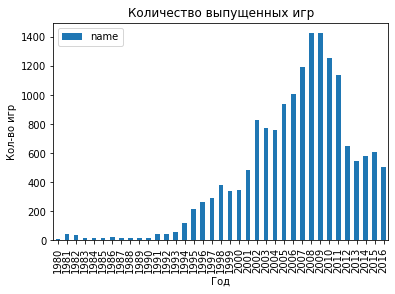

In [27]:
df.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='bar')
plt.title('Количество выпущенных игр')
plt.xlabel('Год')
plt.ylabel('Кол-во игр')
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошая визуализация и правильно, что оси подписаны и есть название графика.</font>

В 1994 года начался рост популярности игр. Данные до этого года нет необходимсти рассматривать в работе при текущией цели исследования.
Пик популярности игр наблюдается в 2008-2009 годах. Затем популярность спала.

In [28]:
actual_df = df.query('year_of_release > 1993')

Рассмотрим продажи по каждой платформе и отсортируем значения по возрастанию. 

In [29]:
#df.groupby('platform')['sales'].sum().sort_values()

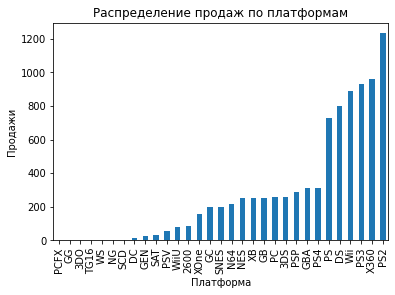

In [30]:
df.groupby('platform')['sales'].sum().sort_values().plot(kind='bar')
plt.title('Распределение продаж по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()

</font><font color='Blue'><b>Готово</b></font><br>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Красивые и информативные графики всегда приветствуются, особенно когда на них есть все подписи осей, названия меток и название графика. Как правило, заказчик не является аналитиком и ему трудно по коду разбираться, что изображено на диаграммах. Кроме того, в презентацию реального проекта в основном идут именно скрины графиков, таблицы мало информативны. По этому необходимо сразу графики максимально описывать.</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 При анализе принято визуализировать результаты в виде графиков или диаграмм. Таблицы малоинформативны и не наглядны. Можно вот так:</font>
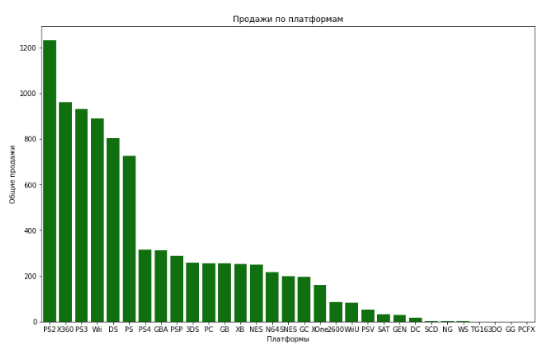

Первые 7 платформ в списке имеют слижком низкие продажи, скорее всего они были слишком непопулярны и долго не просуществовали на рынке.

In [31]:
actual_df = actual_df.query('(platform != "PCFX") and (platform != "GG") and (platform != "3DO") and (platform != "TG16") and (platform != "WS") and (platform != "NG") and (platform != "SCD")')

Посмотрим на популярность разных платформ по годам. 

Text(0.5, 1.0, 'Продажи для каждой платформы по годам')

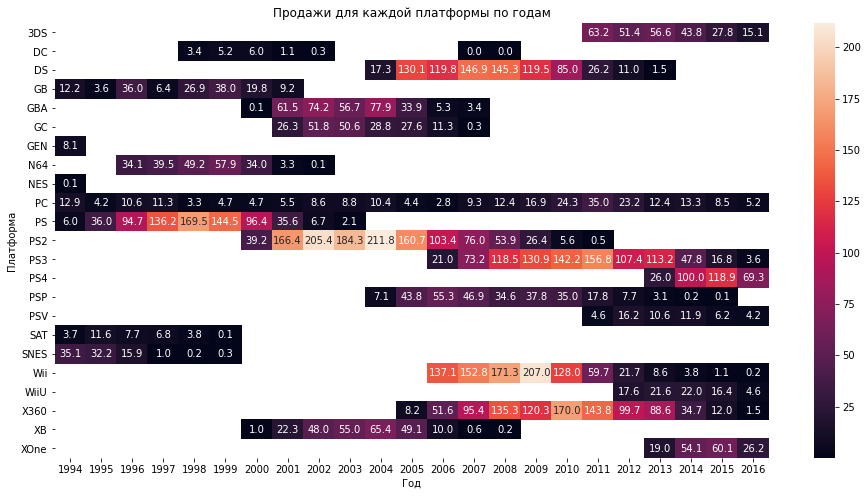

In [32]:
plt.figure(figsize = (16,8))
seaborn.heatmap(
    actual_df.pivot_table(index='platform', columns='year_of_release', values='sales', aggfunc='sum'),
    annot=True, fmt=".1f"
)
plt.xlabel('Год')
plt.ylabel('Платформа')
plt.title('Продажи для каждой платформы по годам')

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Визуализация данных графиками и диаграммами подразумевает подписи всех осей и название графика  на русском языке, при необходимости наличие меток. Это относится ко всем графикам/диаграммам проекта и является критической ошибкой.</font>

Крупные игроки на рынке, такие как PlayStation, Xbox, Wii стараются каждые 5-6 лет как только начинает спадать спрос выпускать новую версию свой платформы.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Вот, что написано в задании: <br><b>За какой характерный срок появляются новые и исчезают старые платформы?</b> <br>А это не сделано.</font>

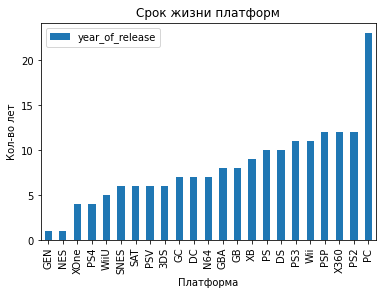

In [33]:
actual_df.pivot_table(index='platform', values='year_of_release', aggfunc=pd.Series.nunique).sort_values(by='year_of_release').plot(kind='bar')
plt.title('Срок жизни платформ')
plt.xlabel('Платформа')
plt.ylabel('Кол-во лет')
plt.show()

</font><font color='Blue'><b>Средний возраст жизни платформы:</b></font><br>

In [34]:
print('Средний возраст жизни платформы', actual_df.pivot_table(index='platform', values='year_of_release', aggfunc=pd.Series.nunique).mean())

Средний возраст жизни платформы year_of_release    8.086957
dtype: float64


<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 Не корректно определять срок жизни платформы по средним, платформа "PC" существует весь период, но она на самом деле пртерпела кардинальные изменения.</font>

In [71]:
# Комментарий ревьюера 2
temp = df.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

Для прогноза на 2017 год был выбран период с 2012 года (включительно) как актуальный, так как практически все платформы (кроме DS) существовавшие в 2012 пользуются спросом до сих пор.

In [35]:
actual_df = df.query('year_of_release > 2011')

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильно выбран актуальный период. 👍 Сейчас в наше динамичное время в бизнесе уже используются для прогноза периоды в 2-3 года.</font>

Рассмотрим на основе актуальных данных продажи по разным платформам

In [36]:
actual_df.groupby('platform')['sales'].sum().sort_values()

platform
PSP      11.19
DS       12.55
Wii      35.37
PSV      49.18
PC       62.65
WiiU     82.19
XOne    159.32
3DS     194.61
X360    236.54
PS3     288.78
PS4     314.14
Name: sales, dtype: float64

Рассмотрим как изменялись продажи по годам для 5 платформ с самыми большими продажами.

In [37]:
#top_5 = actual_df.query('(platform == "XOne") or (platform == "3DS") or (platform == "X360") or (platform == "PS3") or (platform == "PS4")')

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Не корректно создавать списки для фильтрации руками, а не извлекать их срезом из данных таблицы, см.код ниже. В реальном проекте, если нам во время проведения исследования принесут другой датасет, мол он более полный, то придется после его загрузки просматривать весь код и править введенные вручную данные. При формировании срезом этого делать не придется, может только откорректировать размер самого среза.</font>

In [38]:
# Комментарий ревьюера
temp = actual_df.copy() 
list(temp.groupby('platform')['sales'].sum().sort_values(ascending=False).index[:5])

['PS4', 'PS3', 'X360', '3DS', 'XOne']

In [39]:
actual_platforms = list(actual_df.groupby('platform')['sales'].sum().sort_values(ascending=False).index[:5])
top_5 = actual_df.query('platform in @actual_platforms')

</font><font color='Blue'><b>Готово</b></font><br>

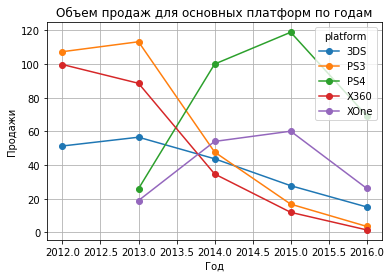

In [40]:
(
    top_5.pivot_table(index='year_of_release', columns='platform', values='sales', aggfunc='sum')
    .plot(style='-o', title='Объем продаж для основных платформ по годам', grid = True)
)
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.show();

Последние 2 года наблюдается спад продаж по всем платформам. Скорее всего спад продолжится, но среди лидеров на будущий год все равно будут PS4 и XOne.
Когда компания только выпускает новую платформу у нее наблюдается сначала плавный рост продаж, и затем такой же плавный спад.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по популярным платформам.

In [41]:
#seaborn.boxplot(x='sales', y='platform', data=top_5)

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Диаграмма не оформлена необходимым образом. Здесь и далее в проекте.<br>Если есть с этим трудности, то следует обратиться за помощью к преподавателю.</font><br>
<font color='Red'>🛠 Почему строим диаграммы размаха с фильтрацией по платформам? В задании топ-платформы не требуются, предполагаются все за актуальный период. Таким образом можно потерять значимую информацию. <br>Видимо, ввело в заблуждение предыдущее задание, где надо было определить лидеров. Но в заданиях на проект отдельно указывается, где необходимо анализировать топ.<br> Всегда при анализе следует использовать все данные, а потом можно их фильтровать от лишней информации.<br>А диаграммы размаха надо строить в двух видах, в полном, со всеми выбросами и масштабированном с крупными боксплотами. Для вывода только нижней части boxplot-ов необходимо использовать параметр хlim. Пример ниже:</font>
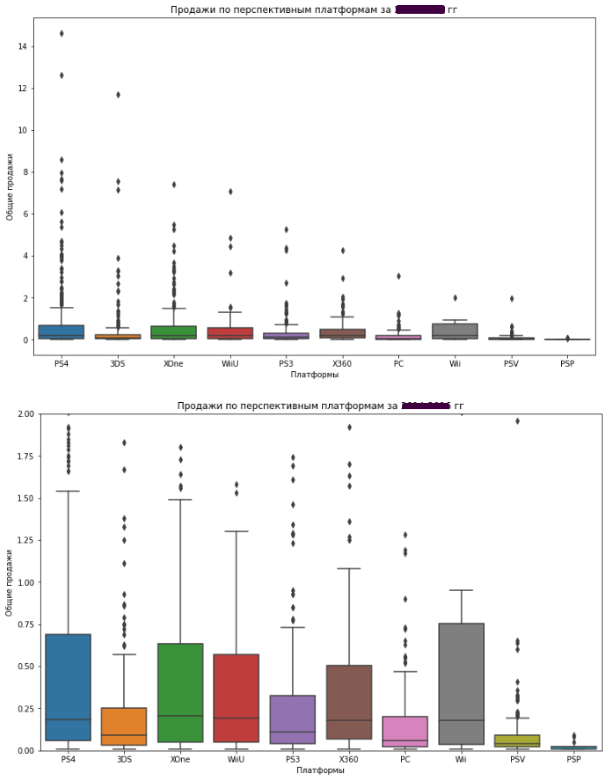

Text(0, 0.5, 'Продажи')

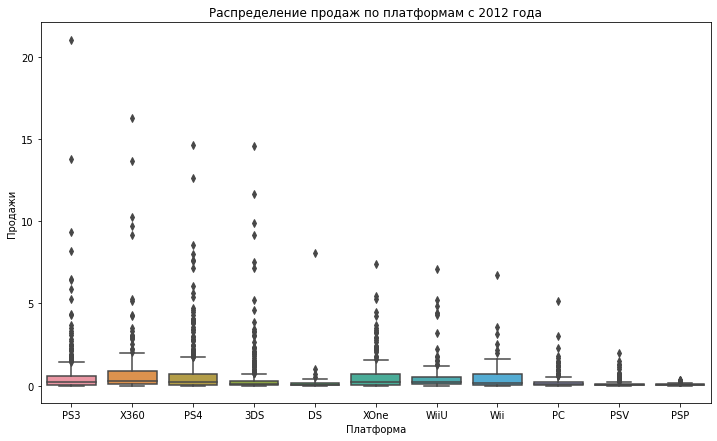

In [42]:
plt.figure(figsize=(12,7))
seaborn.boxplot(y='sales', x='platform', data=actual_df)
plt.title('Распределение продаж по платформам c 2012 года')
plt.xlabel('Платформа')
plt.ylabel('Продажи')

В данных большое количество выбросов. причем для непопулярных платформ диапазон выбрасов значительно меньше, чем у популярных. Увеличим масштаб по оси y.

Text(0, 0.5, 'Продажи')

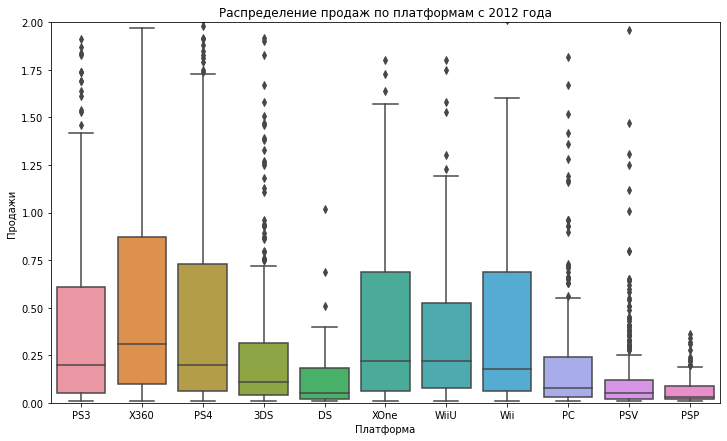

In [43]:
plt.figure(figsize=(12,7))
seaborn.boxplot(y='sales', x='platform', data=actual_df)
plt.ylim(0, 2)
plt.title('Распределение продаж по платформам c 2012 года')
plt.xlabel('Платформа')
plt.ylabel('Продажи')

In [44]:
actual_df.groupby('platform')['sales'].describe().sort_values(by='mean')

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
PSP,173.0,0.064682,0.071296,0.01,0.0200,0.03,0.0900,0.36
PSV,411.0,0.119659,0.203011,0.01,0.0200,0.05,0.1200,1.96
PC,250.0,0.250600,0.494640,0.01,0.0300,0.08,0.2400,5.14
DS,31.0,0.404839,1.439245,0.01,0.0200,0.05,0.1850,8.06
3DS,396.0,0.491439,1.387161,0.01,0.0400,0.11,0.3125,14.60
WiiU,147.0,0.559116,1.058836,0.01,0.0800,0.22,0.5250,7.09
PS3,492.0,0.586951,1.464113,0.01,0.0500,0.20,0.6100,21.05
XOne,247.0,0.645020,1.036139,0.01,0.0600,0.22,0.6850,7.39
Wii,54.0,0.655000,1.165447,0.01,0.0625,0.18,0.6875,6.76


- Самый большой разброс данных имеет платформа X360. 
- Платформа PS3 имеет самое большое максимальное значение, но отстает по средним показателям от PS4 и X360.
- 50% процентов значений для топовых платформ лежит примерно на одном уровне. Можно сказать что ценник на игры разных платформ примерно одинаковый, за исключением X360, где он немного выше. 

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 Для интерпретации диаграмм размаха помогает вспомнить, что означают боксплоты. В данном случае расположение боксплота и медианы показывают у какой платформы стабильно высокие продажи. Соответственно, Стримчик должен ориентироваться на такие платформы, так как какая игра в 2017 году выстрелит не известно.</font>
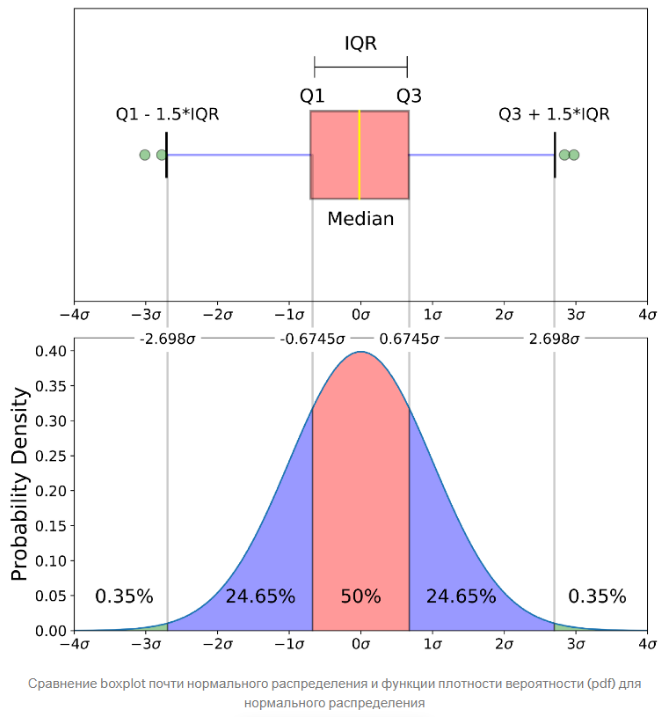

Рассмотрим зависят ли продажи игр на примере платформы PS4 от оценки других пользователей

In [45]:
# (
#     actual_df
#     .query('platform == "PS4"')
#     .pivot_table(index='sales', values='user_score')
#     .plot(style='o', title='Зависимость продаж от оценки пользователей', grid = True)
# )
# plt.xlabel('Продажи PS4')
# plt.ylabel('Оценка пользователей')
# print('Коэффициент корреляции продаж и оценки игр пользователями:', actual_df['sales'].corr(actual_df['user_score']))

Зависмость уровня продаж от оценки пользователей отсутствует. 

Рассмотрим зависят ли продажи игр на примере платформы PS4 от оценки критиков:

In [46]:
# (
#     actual_df
#     .query('platform == "PS4"')
#     .pivot_table(index='sales', values='critic_score')
#     .plot(style='o', title='Зависимость продаж от оценки критиков', grid = True)
# )
# plt.xlabel('Продажи PS4')
# plt.ylabel('Оценка критиков')
# print('Зависимость продаж от оценки критиков:', actual_df['sales'].corr(actual_df['critic_score']))

Получена слабая положительная корреляция. 

Посмотрим, что с продажами игр на других платформах:

In [47]:
# (
#     actual_df
#     .pivot_table(index='sales', values='critic_score')
#     .plot(style='o', title='Зависимость продаж от оценки критиков', grid = True)
# )
# plt.xlabel('Общие продажи')
# plt.ylabel('Оценка критиков')
# print('Зависимость продаж от оценки критиков:', actual_df['sales'].corr(actual_df['critic_score']))

Получаем аналогичное значение коэффициента корреляции. Оценка критиков влияет на продажи игр, при этом оценка пользователлей не оказывает никакого влияния. Люди больше доверяют профессиональной оценке.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 В задании написано: <b>Соотнесите выводы с продажами игр на других платформах.</b> А сделанно только одна и остальное суммарно и только по отзывам критиков. Выводы, сделанные на основе диаграмм рассеяния и расчетов по нескольким платформам выглядят "весомей" и убедительней. Все платформы не надо, но хотя бы штук пять. Построение диаграмм рассеяния и расчет корреляции можно сделать циклом по каждой платформе и по каждому виду отзывов.</font>

</font><font color='Blue'><b>Проверим взаимосвязи между отзывами и продажами для раличных платформ.</b></font><br>

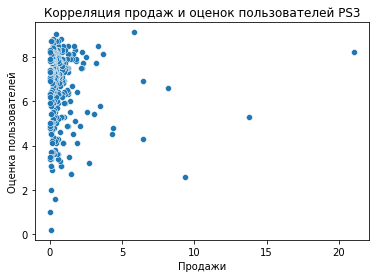

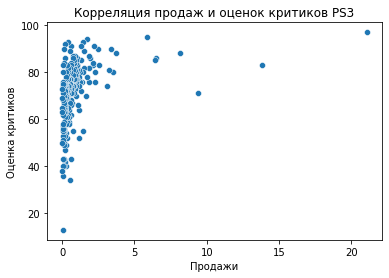

Коэффициент корреляции продаж и оценки игр пользователями: PS3 -0.006205767686051522
Коэффициент корреляции продаж от оценки критиков: PS3 0.3341517575509856


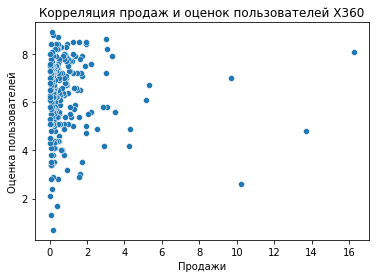

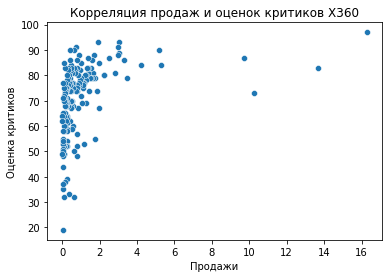

Коэффициент корреляции продаж и оценки игр пользователями: X360 0.0061639786462133256
Коэффициент корреляции продаж от оценки критиков: X360 0.36057348885073365


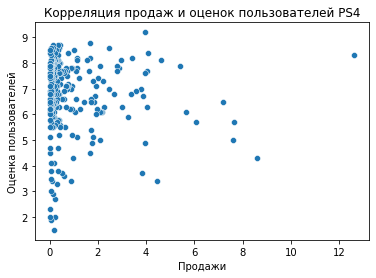

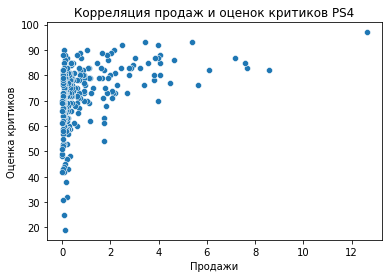

Коэффициент корреляции продаж и оценки игр пользователями: PS4 -0.031957110204556376
Коэффициент корреляции продаж от оценки критиков: PS4 0.406567902061781


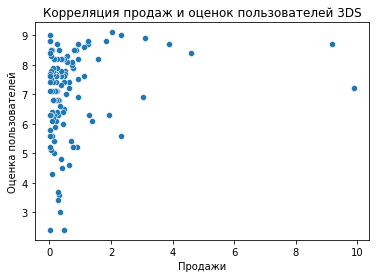

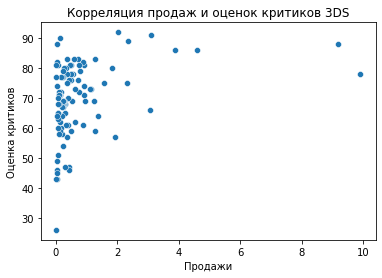

Коэффициент корреляции продаж и оценки игр пользователями: 3DS 0.19758263411038596
Коэффициент корреляции продаж от оценки критиков: 3DS 0.32080286953607845


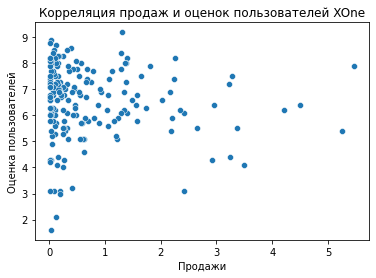

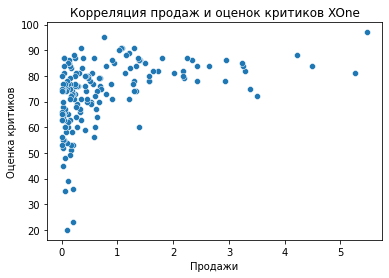

Коэффициент корреляции продаж и оценки игр пользователями: XOne -0.06892505328279412
Коэффициент корреляции продаж от оценки критиков: XOne 0.41699832800840175


In [48]:
for i in top_5['platform'].unique():
    (
        seaborn.scatterplot(data = top_5.loc[top_5['platform'] == i], x = 'sales', y='user_score')
        .set_title(f'Корреляция продаж и оценок пользователей {i}')
    )
    plt.xlabel('Продажи')
    plt.ylabel('Оценка пользователей')
    plt.show();
    (
        seaborn.scatterplot(data = top_5.loc[top_5['platform'] == i], x = 'sales', y='critic_score')
        .set_title(f'Корреляция продаж и оценок критиков {i}')
    )
    plt.xlabel('Продажи')
    plt.ylabel('Оценка критиков')
    plt.show();
    print('Коэффициент корреляции продаж и оценки игр пользователями:', i, top_5.loc[top_5['platform'] == i]['sales'].corr(top_5['user_score']))
    print('Коэффициент корреляции продаж от оценки критиков:', i, top_5.loc[top_5['platform'] == i]['sales'].corr(actual_df['critic_score']))

Для большинства платформ полностью отсутствует связь между отзывами пользователей и продажами, исключение составляет только платформа 3DS, где между этими параметрами наблюдается слабая корреляция 0.2
Однако между оценками критиков и популярностью игр взаимосвязь уже есть (коэффициент корреляции от 0.3 до 0.4), причем хорошая, особенно для платформ PS4 и Xone.

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Для оценки корреляции лучше пользоваться вот этой шкалой:</font>
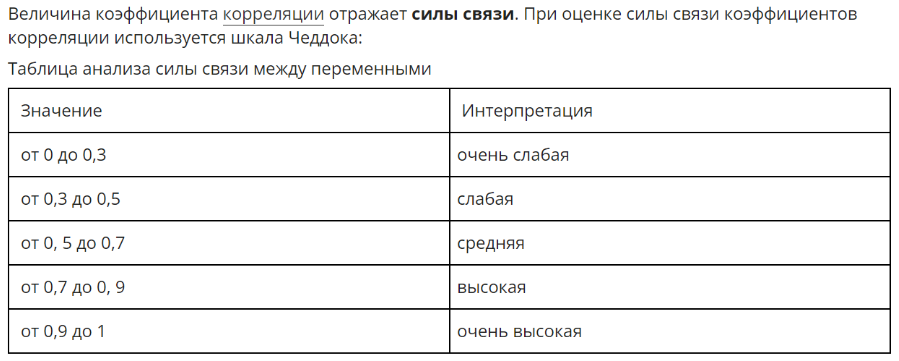

Посмотрим на общее распределение игр по жанрам и сколько продаж приходится на каждый жанр.

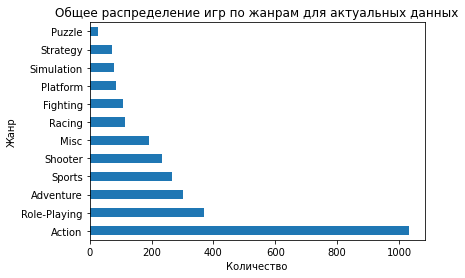

In [49]:
actual_df['genre'].value_counts().plot(kind='barh')
plt.title('Общее распределение игр по жанрам для актуальных данных')
plt.xlabel('Количество')
plt.ylabel('Жанр')
plt.show()
# actual_df.groupby('genre')['sales'].sum().sort_values(ascending=False).plot(kind='barh')
# plt.title('Распределение игр по продажам для актуальных данных')
# plt.xlabel('Сумма продаж')
# plt.ylabel('Платформа')
# plt.show()

На общем распределении игр по жанрам видно, что жанр Action преобладает по кол-ву игр, меньше всего игр в жанре Puzzle.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Здесь попали в ловушку, что максимальные продажи являются самыми прибыльными. Но в данных продажи по жанру для разных платформ, и если одна платформа со своей одной игрой в данном жанре выстрелила, а остальные провалились, то все равно будет виден максимум общих продаж. Но для прибыльности нужны стабильные жанры, который приносят доход не зависимо от платформы, значит на этот жанр есть устойчивый спрос.</font><br>
<font color='Red'>🛠 По этому лучше добавить сравнение медианных продаж, проиллюстрировав их диаграммами размаха и изменить промежуточные выводы.</font>

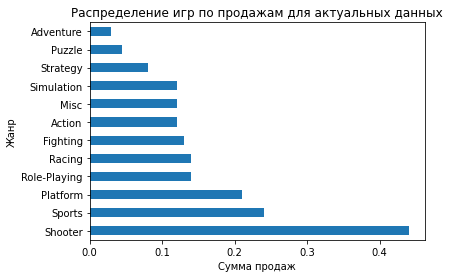

In [50]:
actual_df.groupby('genre')['sales'].median().sort_values(ascending=False).plot(kind='barh')
plt.title('Распределение игр по продажам для актуальных данных')
plt.xlabel('Сумма продаж')
plt.ylabel('Жанр')
plt.show()

Text(0, 0.5, 'Продажи')

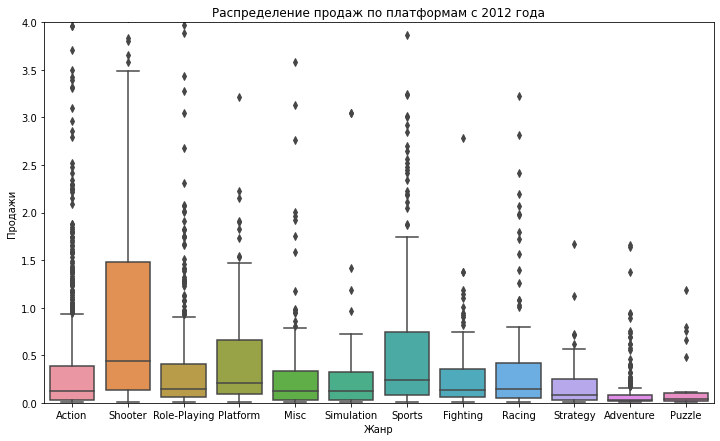

In [51]:
plt.figure(figsize=(12,7))
seaborn.boxplot(y='sales', x='genre', data=actual_df)
plt.ylim(0, 4)
plt.title('Распределение продаж по платформам c 2012 года')
plt.xlabel('Жанр')
plt.ylabel('Продажи')

Теперь мы видим, что если игр какого-то жанра больше - это еще не значит, что они самые прибыльные. Самым популярным жанром c большим отрывом от других является Shooter, затем идут Sports и Platform. Хотя в жанре Action больше всего игр, но высокими проажами они похвастаться не могут. Самые непопулярные Adventure и Puzzle

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 В проекте под "прибыльностью" понимается наличие устойчивого спроса пользователей на данный жанр. Можно сделать уникальный сюжет, быстрый движок, красивую графику и вложить немеряно денег в рекламу и продажи игры подпрыгнут. Но нам лучше выбирать игру из жанра, на которой есть постоянный спрос независимо от маркетинговых усилий производителей игр.<br>
Это хороший пример, когда на одних и тех же данных разные диаграммы дают разный анализ. Визуализация это не только красивое представление табличных данных, а еще и инструмент анализа.</font>

### Вывод
В 1994 года начался рост популярности игр. Пик популярности игр наблюдается в 2008-2009 годах. Затем популярность спала.
Крупные игроки на рынке, такие как PlayStation, Xbox, Wii стараются каждые 5-6 лет как только начинает спадать спрос выпускать новую версию свой платформы. Средний возраст жизни платформы 8 лет. Когда компания только выпускает новую платформу у нее наблюдается сначала плавный рост продаж, и затем такой же плавный спад.
Для прогноза на 2017 год был выбран период с 2012 года (включительно) как актуальный, так как практически все платформы (кроме DS) существовавшие в 2012 пользуются спросом до сих пор. 
Последние 2 года наблюдается спад продаж по всем платформам. Скорее всего спад продолжится, но среди лидеров на будущий год все равно будут PS4 и XOne.
В данных по статистике прожад для различных платформ В данных большое количество выбросов. Причем для непопулярных платформ диапазон выбрасов значительно меньше, чем у популярных. Можно предположжить, что выбросы это высокие цены на отдельные игры. - Самый большой разброс данных имеет платформа X360. Платформа PS3 имеет самое большое максимальное значение, но отстает по средним показателям от PS4 и X360. 50% процентов значений для топовых платформ лежит примерно на одном уровне. Можно сказать что ценник на игры разных платформ примерно одинаковый, за исключением X360, где он немного выше. Популярные платформы имеют схожие рапределения статистики продаж.

Для большинства платформ полностью отсутствует связь между отзывами пользователей и продажами, исключение составляет только платформа 3DS, где между этими параметрами наблюдается слабая корреляция 0.2
Однако между оценками критиков и популярностью игр взаимосвязь уже есть (коэффициент корреляции от 0.3 до 0.4), причем хорошая, особенно для платформ PS4 и Xone.

На общем разспределении игр по жанрам видно, что жанр Action преобладает по кол-ву игр, меньше всего игр в жанре Puzzle. Если игр какого-то жанра больше - это еще не значит, что они самые прибыльные. Самым популярным жанром c большим отрывом от других является Shooter, затем идут Sports и Platform. Хотя в жанре Action больше всего игр, но высокими проажами они похвастаться не могут. Самые непопулярные Adventure и Puzzle.

## Анализ портрета пользователя для каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Портрет пользователя из Северной Америки

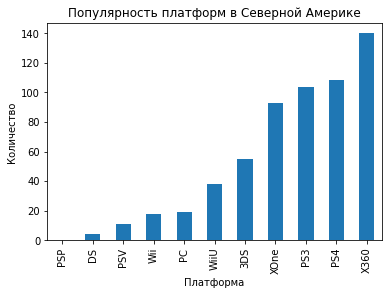

In [52]:
actual_df.groupby('platform')['na_sales'].sum().sort_values().plot(kind='bar')
plt.title('Популярность платформ в Северной Америке')
plt.xlabel('Платформа')
plt.ylabel('Количество')
plt.show()

Самая популярная платформа для пользователей из Северной Америки - это X360. Платформы PlayStation  тоже занимают лидирующие позиции.

Топ-5:

In [53]:
actual_df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head()

platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      55.31
Name: na_sales, dtype: float64

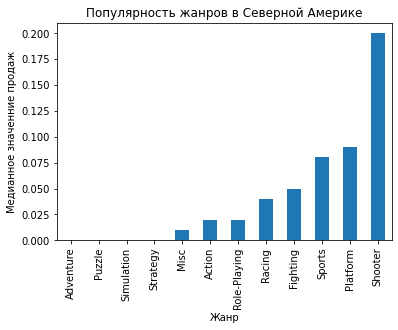

In [54]:
actual_df.groupby('genre')['na_sales'].median().sort_values().plot(kind='bar')
plt.title('Популярность жанров в Северной Америке')
plt.xlabel('Жанр')
plt.ylabel('Медианное значенние продаж')
plt.show()

Самым популярным жанром в Северной Америке является Shooter, затем идут  Sports и Platform. Самые непопулярные игры в жанрах  Puzzle и Adventure

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 При анализе ограниченного объема данных, в данном случае это конкретные регионы, лучше анализ проводить по суммарным продажам, а не средним/медианам. <br>Суть в том, что на конкретном рынке все продажи составляют определенную сумму, которая распределена по платформам/жанрам/возрастному рейтингу. Таким образом, можно сегментировать регионы по предпочтениям пользователей.</font>

Топ-5:

In [55]:
actual_df.groupby('genre')['na_sales'].median().sort_values(ascending=False).head()

genre
Shooter     0.20
Platform    0.09
Sports      0.08
Fighting    0.05
Racing      0.04
Name: na_sales, dtype: float64

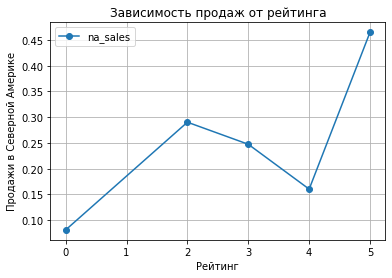

In [56]:
(
    actual_df.pivot_table(index='rating', values='na_sales')
    .plot(style='-o', title='Зависимость продаж от рейтинга', grid = True)
)
plt.xlabel('Рейтинг')
plt.ylabel('Продажи в Северной Америке')
plt.show();

С увеличением разрешенного возраста для игры, увеличивается и ее популярность. Наибольшей популярностью пользуются игры с рейтингом M, а также популярены игры с рейтингом E10+.

### Портрет пользователя из Европы

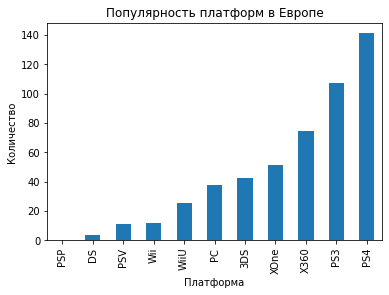

In [57]:
actual_df.groupby('platform')['eu_sales'].sum().sort_values().plot(kind='bar')
plt.title('Популярность платформ в Европе')
plt.xlabel('Платформа')
plt.ylabel('Количество')
plt.show()


Наибольшую популярность в Европе имеются платформы PS4 и PS3 с небольшим оставанием второй. Затем идут платформы Xbox. Очень популярная в Японии платформа платформа 3DS - для Европы находится только на 5 месте по продажам. 

Топ - 5:

In [58]:
actual_df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head()

platform
PS4     141.09
PS3     106.85
X360     74.52
XOne     51.59
3DS      42.64
Name: eu_sales, dtype: float64

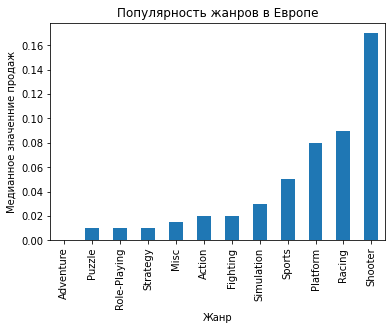

In [59]:
actual_df.groupby('genre')['eu_sales'].median().sort_values().plot(kind='bar')
plt.title('Популярность жанров в Европе')
plt.xlabel('Жанр')
plt.ylabel('Медианное значенние продаж')
plt.show()

Самым популярным жанром в Европе является Shooter, затем идут Racing и Platform. Самые непопулярные игры в жанрах  Puzzle и Adventure

Топ-5 жанров в Европе:

In [60]:
actual_df.groupby('genre')['eu_sales'].median().sort_values(ascending=False).head()

genre
Shooter       0.17
Racing        0.09
Platform      0.08
Sports        0.05
Simulation    0.03
Name: eu_sales, dtype: float64

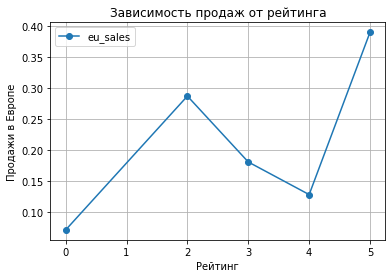

In [61]:
(
    actual_df.pivot_table(index='rating', values='eu_sales')
    .plot(style='-o', title='Зависимость продаж от рейтинга', grid = True)
)
plt.xlabel('Рейтинг')
plt.ylabel('Продажи в Европе')
plt.show();

Зависимость продаж от рейтинга в Европе аналогична картине на рынке Северной америки. С увеличением разрешенного возраста для игры, увеличивается и ее популярность. Наибольшей популярностью пользуются игры с рейтингом M, а также популярены игры с рейтингом E10+.

### Портрет пользователя из Японии

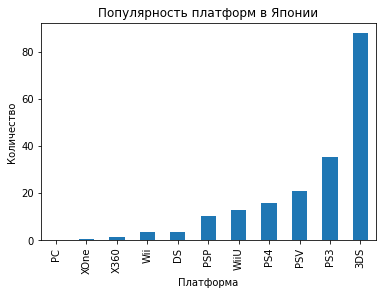

In [62]:
actual_df.groupby('platform')['jp_sales'].sum().sort_values().plot(kind='bar')
plt.title('Популярность платформ в Японии')
plt.xlabel('Платформа')
plt.ylabel('Количество')
plt.show()

Высокую популярность в Японии имеет платформа 3DS, причем со значительным отрывом от других платформ. Последняя версия PlayStation - PS4 имеет совсем невысокую пополярность на китайском рынке, при этом PS3 до сих пор находится по продажам на 2 месте. Платформы Xbox вообще не популярны в Японии.

Топ-5:

In [63]:
actual_df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head()

platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64

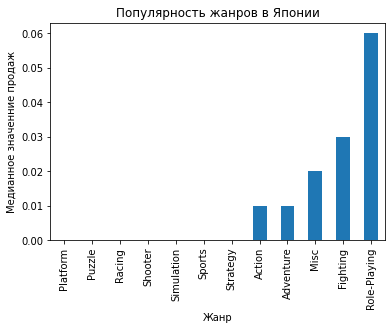

In [64]:
actual_df.groupby('genre')['jp_sales'].median().sort_values().plot(kind='bar')
plt.title('Популярность жанров в Японии')
plt.xlabel('Жанр')
plt.ylabel('Медианное значенние продаж')
plt.show()

В Японии наибольшей популярностью пользуется жанр Role-Playing с большим отрывом по популярности, затем на втором месте жанр Fighting. Большая часть жанров на японском рынке не имеет данных о продажах.

Топ-5:

In [65]:
actual_df.groupby('genre')['jp_sales'].median().sort_values(ascending=False).head()

genre
Role-Playing    0.06
Fighting        0.03
Misc            0.02
Action          0.01
Adventure       0.01
Name: jp_sales, dtype: float64

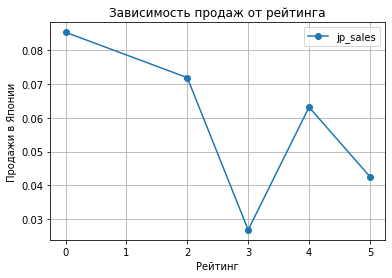

In [66]:
(
    actual_df.pivot_table(index='rating', values='jp_sales')
    .plot(style='-o', title='Зависимость продаж от рейтинга', grid = True)
)
plt.xlabel('Рейтинг')
plt.ylabel('Продажи в Японии')
plt.show();

В Японии не принят рейтинг для игр по системе ESRB, соответсвенно наибольшая часть игр попала в категорю 0. Однако игры с высоким возрастным рейтингом как в дугих странах тоже имеют некую популярность.

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Это пример, когда пропуски в датасете имеют значение. В Японии свой рейтинг и им мало интересны игры с Северо-Американским рейтингом. А есть еще рейтинги ЕС, отдельно в Германии, в Австралии и т.д. Но у нас нет по ним данных и в данном случае пропуск является признаком, что игра имеет другой рейтинг и выпускалась не в Северной Америке.</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 В задании просят сделать анализ по топ-5. И лучше визуализировать круговой диаграммой, только продажи платформ/жанров не вошедших в топ, собрать в одной группе, например "Другие", и по платформам, и по жанрам. Тогда на круговых диаграммах хорошо видны все региональные рынки игр с разбиением на платформы/жанры. Какая платформа/жанр занимает какую долю рынка. Тогда визуализация несет определенную бизнес-логику, связанную именно с долями рынка занимаемыми платформами/жанрами. А этого не дают другие виды диаграмм. Примерно вот так:</font>
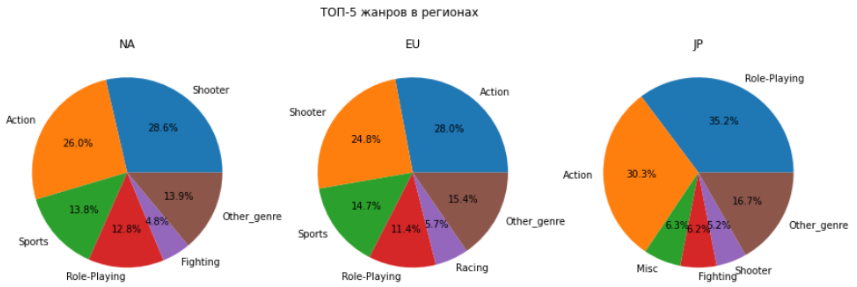

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 При предобработке данных пропуски в рейтинге ESRB были заполнены синтетическими данными и тем самым исключены из анализа. Но продажи именно этих игр могут указать на ключевое различие в регионах.</font><br>
<font color='DarkMagenta'>👉 Проблема у нас в том, что если посмотреть в инете, что из себя представляет рейтинг ESRB, то окажется, что он предназначен для маркировки игр для США и Канады. И логично, что для других регионов он не заполняется. Наша задача смотреть шире на исходный датасет, так как за цифрами находятся реальные бизнес-процессы. И мы должны это учитывать при предобработке данных. Для анализа надо заменить пропуски в рейтинге заглушкой и сделать анализ вместе с ней.</font>

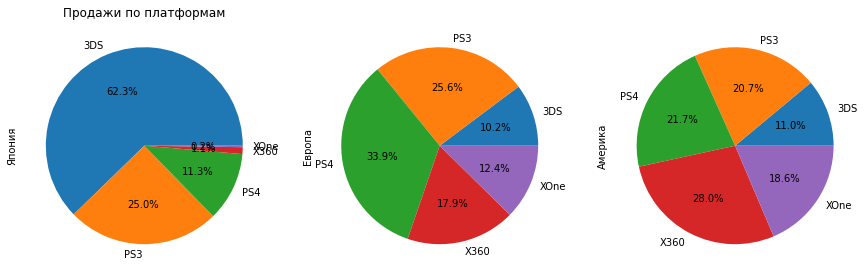

In [67]:
actual_platforms = list(actual_df.groupby('platform')['sales'].sum().sort_values(ascending=False).index[:5])
plt.subplot(1, 3, 1)
plt.title('Продажи по платформам')
actual_df.query('platform in @actual_platforms').groupby('platform')['jp_sales'].sum().plot(kind='pie', autopct='%1.1f%%', figsize = (15,8))
plt.ylabel('Япония')
plt.subplot(1, 3, 2)
actual_df.query('platform in @actual_platforms').groupby('platform')['eu_sales'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('Европа')
plt.subplot(1, 3, 3)
actual_df.query('platform in @actual_platforms').groupby('platform')['na_sales'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('Америка')
plt.show();

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Молодец, хорошее решение. Но с "другими" было бы лучше, так как здесь доли платформ отображаются среди топа, а не по всему региональному рынку.</font>

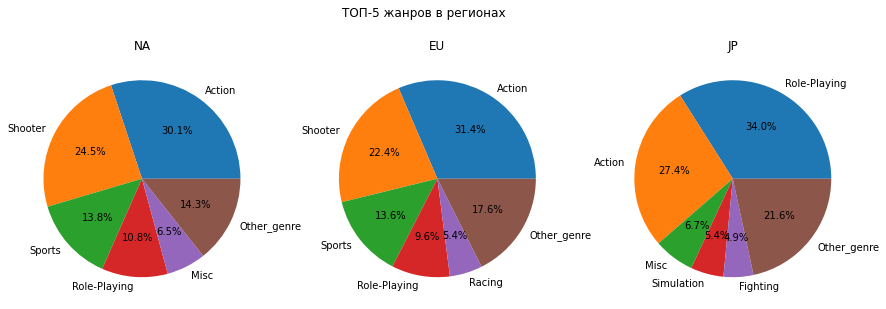

In [72]:
# Комментарий ревьюера 2
tmp = actual_df.copy()
region = tmp.columns[4:7]
# начертим круговую диаграмму для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 жанров в регионах')
for i in range(len(region)):
  # выберем 5 самых продающих жанров
  df_i = (tmp.groupby('genre')[region[i]].sum().reset_index().
          sort_values(region[i], ascending = False, ignore_index = True)[:5])
  # занесем все остальыне продажи в другие жанры
  df_i = df_i.append({'genre': 'Other_genre', region[i]: tmp[region[i]].sum() - df_i[region[i]].sum()}, ignore_index= True)
  axs[i].pie(df_i[region[i]], labels = df_i['genre'], autopct='%1.1f%%')
  # Зададим название региона.
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

### Вывод
1. Пользователи из Северной Америки. Самая популярная платформа для пользователей из Северной Америки - это X360. Платформы PlayStation  тоже занимают лидирующие позиции. Самым популярным жанром в Северной Америке является Shooter, затем идут  Sports и Platform. Самые непопулярные игры в жанрах  Puzzle и Adventure. С увеличением разрешенного возраста для игры, увеличивается и ее популярность. Наибольшей популярностью пользуются игры с рейтингом M, а также популярены игры с рейтингом E10+. Поведение пользователей в Европе и Америке очень схожее.
2. Пользователи из Европы. Наибольшую популярность в Европе имеются платформы PS4 и PS3 с небольшим оставанием второй. Затем идут платформы Xbox. Очень популярная в Японии платформа платформа 3DS - для Европы находится только на 5 месте по продажам. Зависимость продаж от рейтинга в Европе аналогична картине на рынке Северной америки. С увеличением разрешенного возраста для игры, увеличивается и ее популярность. Наибольшей популярностью пользуются игры с рейтингом M, а также популярены игры с рейтингом E10+. Самым популярным жанром в Европе является Shooter, затем идут Racing и Platform. Самые непопулярные игры в жанрах  Puzzle и Adventure.
3. Пользователи из Японии. Высокую популярность в Японии имеет платформа 3DS, причем со значительным отрывом от других платформ. Последняя версия PlayStation - PS4 имеет совсем невысокую пополярность на китайском рынке, при этом PS3 до сих пор находится по продажам на 2 месте. Платформы Xbox вообще не популярны в Японии. В Японии не принят рейтинг для игр по системе ESRB, соответсвенно наибольшая часть игр попала в категорю 0. Однако игры с высоким возрастным рейтингом как в дугих странах тоже имеют некую популярность. В Японии наибольшей популярностью пользуется жанр Role-Playing с большим отрывом по популярности, затем на втором месте жанр Fighting. Большая часть жанров на японском рынке не имеет данных о продажах. Продажи в Европе и Америке намного выше, чем в Японии. Японский рынок сильно отличается по преобладающим предпочтениям как в жанре, так и платформе, от европейского и американского рынков.

## Проверка гипотез

### Проверка гипотезы #1 : 
Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC разные

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, правильно сформулированы гипотезы.</font>

In [68]:
alpha = 0.05
results = st.ttest_ind(actual_df.query('platform == "XOne"').dropna()['user_score'],
                       actual_df.query('platform == "PS4"').dropna()['user_score'],
                      )

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 
    
print('Средняя пользовательская оценка XOne:', actual_df.loc[actual_df['platform'] == "XOne"]['user_score'].mean())
print('Средняя пользовательская оценка PS4:', actual_df.loc[actual_df['platform'] == "PS4"]['user_score'].mean())

p-значение: 0.13589706893007367
Не получилось отвергнуть нулевую гипотезу
Средняя пользовательская оценка XOne: 6.521428571428572
Средняя пользовательская оценка PS4: 6.748249027237354


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что отфильтровали пропуски. 👍</font><br>
<font color='DarkGreen'>👌 Правильно, что для тестирования гипотез использован двусторонний t-тест.</font>
<br><font color='Red'>🛠 Только не понятно, куда поехали платформы.</font>
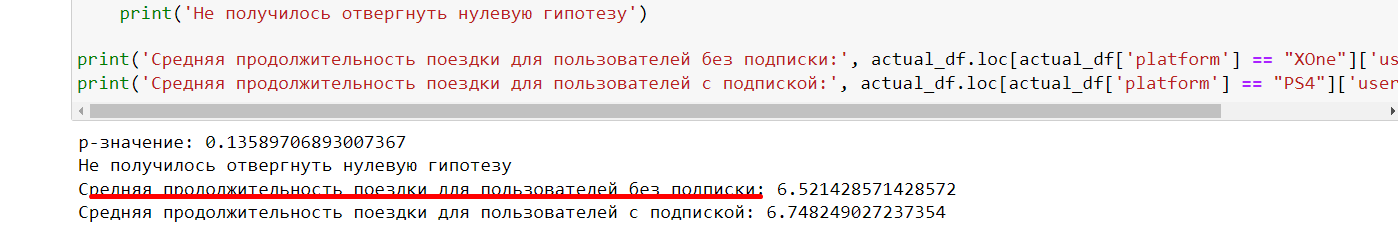

</font><font color='Blue'><b>:)</b></font><br> 

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='Red'>🛠 Пропустил ошибку при первом ревью. В написанном коде сначала удаляются все пропуски из таблицы, а потом датасет фильтруется по отзывам пользователей. Это ошибка. Или необходимо сначало фильтровать по отзывам, а потом удалять пропуски, или при удалении пропусков прямо указывать колонку для удаления. См. код ниже. Самостоятельно исправим?</font>
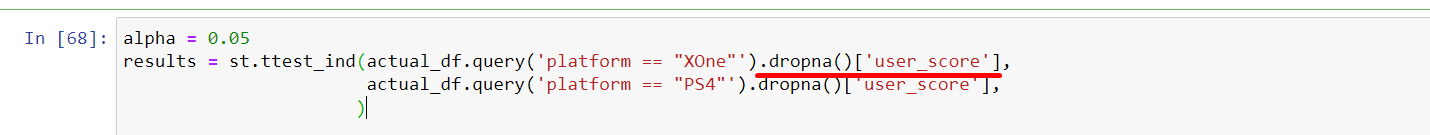

In [76]:
# Комментарий ревьюера 2
(len(actual_df.query('platform == "XOne"').dropna()['user_score']), 
 len(actual_df.query('platform == "XOne"')['user_score'].dropna()),
 len(actual_df.query('platform == "XOne"').dropna(subset=['user_score'])['user_score']))

(165, 182, 182)

Не получилось отвергнуть нулевую гипотезу. При выбраном значении alpha можно считать, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Что говорит о том, что оценка пользователя складывается из впечатления о самой игре и не зависит от платформы.

### Проверка гипотезы #2 : 
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые

Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Не правильно сформулированы гипотезы.</font>

In [69]:
alpha = 0.05
results = st.ttest_ind(actual_df.query('genre == "Action"').dropna()['user_score'],
                       actual_df.query('genre == "Sports"').dropna()['user_score'],
                      )

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 
    
print('Средний пользовательский рейтинг для жанра Action:', actual_df.loc[actual_df['genre'] == "Action"]['user_score'].mean())
print('Средний пользовательский рейтинг для жанра Sports:', actual_df.loc[actual_df['genre'] == "Sports"]['user_score'].mean())

p-значение: 1.2971812049381573e-15
Отвергаем нулевую гипотезу
Средний пользовательский рейтинг для жанра Action: 6.825047801147227
Средний пользовательский рейтинг для жанра Sports: 5.455670103092784


<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='Red'>🛠 Тут аналогичная ошибка. </font>

In [77]:
# Комментарий ревьюера 2
(len(actual_df.query('genre == "Sports"').dropna()['user_score']), 
 len(actual_df.query('genre == "Sports"')['user_score'].dropna()),
 len(actual_df.query('genre == "Sports"').dropna(subset=['user_score'])['user_score']))

(140, 194, 194)

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Не правильно проведено тестирование.</font>

</font><font color='Blue'><b>Формулировка изменена</b></font><br>

Отвергаем нулевую гипотезу. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 Лучше было написать, что на имеющихся данных, на уровне значимости 5% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы.</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Необходимо сделать выводы по данному разделу согласно заданию:<br>
<b>Поясните:<br>
Как вы сформулировали нулевую и альтернативную гипотезы;<br>
Какой критерий применили для проверки гипотез и почему.</b><br>
То есть, необходимо описать принцип формулирования нулевой и альтернативной гипотез, обосновать почему к выборкам применили t-критерий при тестировании гипотез.</font>

</font><font color='Blue'><b> T-test позволяет определить вероятность того, что две выборки взятые из генеральных совокупностей,  имеют одно и то же среднее. Для проверки обоих гипотез был использован метод st.ttest_ind, так как в каждом тесте мы имели две независимые выборки для проверки гипотез о равенстве среднего генеральной совокупности. 

Нулевая гипотеза формулируется с условием равенства. В обоих случаях сформулирована двусторонняя альтернативная гипотеза, так как нас интересует не отклонение в какую-либо сторону, а непостредственно равенство средних</b></font><br>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Хорошо, теперь правильно. 👍</font>

## Общий вывод

В рамках проведеной работыы были изучены данные интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. 
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.

Основной целью было выявить определяющие успешность игры закономерности  с целью сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В переданном датасете представлена следующая информация:
+ Name — название игры
+ Platform — платформа
+ Year_of_Release — год выпуска
+ Genre — жанр игры
+ NA_sales — продажи в Северной Америке (миллионы проданных копий)
+ EU_sales — продажи в Европе (миллионы проданных копий)
+ JP_sales — продажи в Японии (миллионы проданных копий)
+ Other_sales — продажи в других странах (миллионы проданных копий)
+ Critic_Score — оценка критиков (максимум 100)
+ User_Score — оценка пользователей (максимум 10)
+ Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

В данных были выявлены следующие проблемы:
+ Названия столбцов не в нижнем регистре 
+ Столбец с годом релиза имеет неправильным тип
+ Столбец с оценкой пользователей такжеимеет неправильным тип
+ Наблюдается большое количество пропусков, особенно в столбцах с оценками и рейтингом.

На этапе предобработки даных были выполнены следующие действия:
+ Названия столбцов были приведены к нижнему регистру
+ Самый большой процент пропусков отмечен в колонках critic_score, user_score, rating, в который отражается рейтинг компьютерных игр. Однако, столбцы с оценкой пользователей и критиков заполнить медианой по жанру или по платформе было бы неверно, так как оценка игры вряд ли от этого зависит.
+ Пропуски в столбцах с названием игры, годом реализации и жанром затруднительно было заполнить верной информацией и таких пропусков меньше 5%-10%. Эти строки были удалены.
+ Явных дубликатов в таблице не обнаружено
+ Аббревиатура tbd в столбце с оценкой пользователя была заменена на NaN
+ Пропуски в столбце с рейтингом игр заполнены заглушкой, которая значит что рейтинг не определен.
+ Столбец с годом реализации был переведен в формат даты
+ Столбец с оценкой пользователей был приведен к типу float
+ Добавлен столбец с общими продажами
+ Выполнена проверка на неявные дубликаты в столбцах Названи, платформа, год.
+ Найден и удален дубликат - 2 строки отличались только данным о продажах, причем у дубликата они были около 0.

Возможные причины появления пропусков можно разделить на зависящие от человеческого или технического факторов. Пропуски в названии игры, годе реализации и жанре скорее всего относятся к техническому фактору и появлись, например, благодаря неправильной выгрузке. Пропуски в столбцах с оценками могут относится как к техническому, так и человеческому фактору, то есть можно предположить и ошибку при. выгрузке и впринципе отсутсвие этих данных для конкретной игры. Отсутствие оценок часто может наблюдаться у только что вышедших игр.
Пропуски в столбце срейтингом связаны с регионом продаж. Рейтинг ESRB используется только в США, соответсвенно для данных в других регионах пропуск обоснован.

В 1994 года начался рост популярности игр. Пик популярности игр наблюдается в 2008-2009 годах. Затем популярность спала.
Крупные игроки на рынке, такие как PlayStation, Xbox, Wii стараются каждые 5-6 лет как только начинает спадать спрос выпускать новую версию свой платформы. Средний возраст жизни платформы 8 лет. Когда компания только выпускает новую платформу у нее наблюдается сначала плавный рост продаж, и затем такой же плавный спад.
Для прогноза на 2017 год был выбран период с 2012 года (включительно) как актуальный, так как практически все платформы (кроме DS) существовавшие в 2012 пользуются спросом до сих пор. 
Последние 2 года наблюдается спад продаж по всем платформам. Скорее всего спад продолжится, но среди лидеров на будущий год все равно будут PS4 и XOne.
В данных по статистике прожад для различных платформ В данных большое количество выбросов. Причем для непопулярных платформ диапазон выбрасов значительно меньше, чем у популярных. Можно предположжить, что выбросы это высокие цены на отдельные игры. - Самый большой разброс данных имеет платформа X360. Платформа PS3 имеет самое большое максимальное значение, но отстает по средним показателям от PS4 и X360. 50% процентов значений для топовых платформ лежит примерно на одном уровне. Можно сказать что ценник на игры разных платформ примерно одинаковый, за исключением X360, где он немного выше. Популярные платформы имеют схожие рапределения статистики продаж.

Для большинства платформ полностью отсутствует связь между отзывами пользователей и продажами, исключение составляет только платформа 3DS, где между этими параметрами наблюдается слабая корреляция 0.2
Однако между оценками критиков и популярностью игр взаимосвязь уже есть (коэффициент корреляции от 0.3 до 0.4), причем хорошая, особенно для платформ PS4 и Xone.

На общем разспределении игр по жанрам видно, что жанр Action преобладает по кол-ву игр, меньше всего игр в жанре Puzzle. Если игр какого-то жанра больше - это еще не значит, что они самые прибыльные. Самым популярным жанром c большим отрывом от других является Shooter, затем идут Sports и Platform. Хотя в жанре Action больше всего игр, но высокими проажами они похвастаться не могут. Самые непопулярные Adventure и Puzzle.

Портреты пользователей из разных регионов:
1. Пользователи из Северной Америки. Самая популярная платформа для пользователей из Северной Америки - это X360. Платформы PlayStation  тоже занимают лидирующие позиции. Самым популярным жанром в Северной Америке является Shooter, затем идут  Sports и Platform. Самые непопулярные игры в жанрах  Puzzle и Adventure. С увеличением разрешенного возраста для игры, увеличивается и ее популярность. Наибольшей популярностью пользуются игры с рейтингом M, а также популярены игры с рейтингом E10+. Поведение пользователей в Европе и Америке очень схожее.
2. Пользователи из Европы. Наибольшую популярность в Европе имеются платформы PS4 и PS3 с небольшим оставанием второй. Затем идут платформы Xbox. Очень популярная в Японии платформа платформа 3DS - для Европы находится только на 5 месте по продажам. Зависимость продаж от рейтинга в Европе аналогична картине на рынке Северной америки. С увеличением разрешенного возраста для игры, увеличивается и ее популярность. Наибольшей популярностью пользуются игры с рейтингом M, а также популярены игры с рейтингом E10+. Самым популярным жанром в Европе является Shooter, затем идут Racing и Platform. Самые непопулярные игры в жанрах  Puzzle и Adventure.
3. Пользователи из Японии. Высокую популярность в Японии имеет платформа 3DS, причем со значительным отрывом от других платформ. Последняя версия PlayStation - PS4 имеет совсем невысокую пополярность на китайском рынке, при этом PS3 до сих пор находится по продажам на 2 месте. Платформы Xbox вообще не популярны в Японии. В Японии не принят рейтинг для игр по системе ESRB, соответсвенно наибольшая часть игр попала в категорю 0. Однако игры с высоким возрастным рейтингом как в дугих странах тоже имеют некую популярность. В Японии наибольшей популярностью пользуется жанр Role-Playing с большим отрывом по популярности, затем на втором месте жанр Fighting. Большая часть жанров на японском рынке не имеет данных о продажах. Продажи в Европе и Америке намного выше, чем в Японии. Японский рынок сильно отличается по преобладающим предпочтениям как в жанре, так и платформе, от европейского и американского рынков.

В рамках проекта была проверена пара гипотез. Полученные выводы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Что говорит о том, что оценка пользователя складывается из впечатления о самой игре и не зависит от платформы.
2. Рейтинги жанра Action выше, чем в жанре Sports.

Прогноз на 2017 год:
Несмотря на то что пользовательское поведение в Америке и Европе достаточно схоже,тем не менее различия имеются и необходимо дать рекомендации по каждому региону отдельно. Продажи в Европе и Америке в целом выше.
+ Америка: Наибольшую популярность будет иметь платформа X360, игры с жанром Shooter, рейтинг игр М. Люди будут обращать внимание на оценки критиков.
+ Европа: Наибольшую популярность будет иметь платформа PS4, игры с жанром Shooter, рейтинг игр М. Люди будут обращать внимание на оценки критиков.
+ Япония: Японский рынок особенный. Наибольшую популярность будет иметь платформа 3DS, игры с жанрами Role-Playing, рейтинг по американской системе не имеет значение. Люди будут обращать внимание как на оценки критиков, так и на оценки пользователей.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Цель исследования понять, на что потратить рекламный бюджет. В исследовании проанализированы игры с разных сторон. Логично, что рекламный отдел ждет данные на какие платформы (1-2 штуки, на большее у нас не хватит рекламного бюджета), с каким жанром, с каким рейтингом ESRB и в каком регионе рекламировать. Стоит ли обращать внимание на отзывы или нет.<br>Вся информация в проекте уже есть, надо просто акцентировать на какие игры тратить рекламный бюджет. Сделаем?</font>

<font color='DarkBlue'><b>Заключительный комментарий ревьюера</b></font><br><br>
<font color='DarkGreen'>👌 Александра, проект отлично структурирован и проработан.<br>Так держать и дальше!<br></font>
<font color='Red'>🛠 Что нужно, что бы сделать проект лучше:</font><br>
<font color='Red'>🛠 Переделать замену пропусков колонки рейтинга ESRB. Сделать проверку неявных дубликатов. Графики и диаграммы необходимо оформить подписями осей и названием графика/диаграммы на русском языке. Выполнить задание: "За какой характерный срок появляются новые и исчезают старые платформы?" Переделать построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам. Анализ влияния отзывов на продажи надо провести по нескольким платформам. В анализе игр по жанрам надо проанализировать медианные значения продаж, построив диаграммы размаха. Переделать анализ влияния рейтинга ESRB на продажи в регионах. Необходимо правильно сформулировать гипотезы в тесте жанров и переделать тестирование. Необходимо сделать пояснения по разделу гипотез согласно заданию.<br>Обращаю внимание, что <b>все</b> графики/диаграммы проекта должны быть оформлены подписями осей и названиями на русском языке. После исправления ошибок необходимо будет откорректировать выводы анализа.</font><br>
<font color='DarkMagenta'>👉 При исправлении ошибок и недочетов будут приобретены дополнительный опыт и навыки!</font><br>
<font color='DarkGreen'>👌 Жду окончательный вариант! Успехов.</font>

<font color='DarkBlue'><b>Заключительный комментарий ревьюера 2</b></font><br><br>
<font color='DarkGreen'>👌 Александра! Удалось справиться со всеми подводными камнями в проекте.  Молодец! 😄<br>
Входе выполнения проекта узнали, что не все пропуски просто ошибки сбора данных, а несут свои признаки. Для этого понадобилось за данными датасета увидеть смысл этих данных и бизнес-процессы, которые за ними скрываются. Узнали, что медианы могут дать дополнительную информацию при анализе. Это новые знания и навыки, которые пригодятся в будущем!<br>И не забываем правильно удалить пропуски при формировании выборок для тетирования гипотез. Хорошо?<br></font>
<font color='DarkGreen'>👌 Теперь, вперед за новыми знаниями и навыками! Удачи! 😉</font>
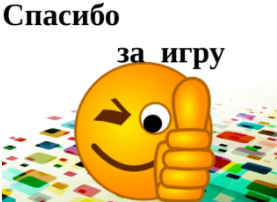